In [2]:
%matplotlib inline
from IPython import display

from __future__ import division, print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../data/Smarket.csv', index_col=0)
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
id,,,,,,,,,
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


This data set consists of percentage returns for the S&P 500 stock index over 1,250 days, from the beginning of 2001 until the end of 2005. For each date, we have recorded the percentage returns for each of the five previous trading days, `Lag1` through `Lag5`. We have also recorded `Volume` (the number of shares traded on the previous day, in billions), `Today` (the percentage return on the date in question) and `Direction` (whether the market was Up or Down on this date).

*--ISLR p. 144*

In [5]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [6]:
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


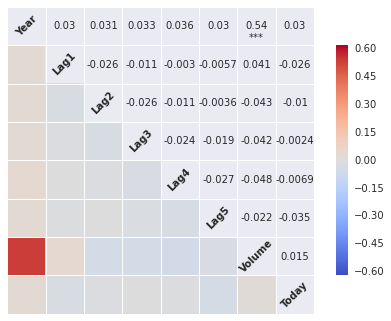

In [7]:
sns.corrplot(df)

In [ ]:
df.Volume.plot()

# Logistic Regression (statsmodels)

In [ ]:
import statsmodels.api as sm

In [ ]:
df['Directiond'] = df.Direction.replace({"Down": 0, "Up": 1})

In [ ]:
formulad = ("Directiond ~ Lag1 + Lag2 + Lag3 + "
            "Lag4 + Lag5 + Volume")

mod = sm.Logit.from_formula(formulad, df)
res = mod.fit()
res.summary()

In [ ]:
formula = ("Direction ~ Lag1 + Lag2 + Lag3 + "
           "Lag4 + Lag5 + Volume")

mod2 = sm.GLM.from_formula(formula, df, family=sm.families.Binomial())
res2 = mod2.fit()
res2.summary()

Same (up to a sign change)

In [ ]:
def ln_odds_to_prob(x):
    odds = np.exp(x)
    prob = odds / (1 + odds)
    return pd.Series(prob)

def classify(x, low_class, high_class):
    b = x <= .5
    return b.map({True: low_class, False: high_class})

In [ ]:
probs = ln_odds_to_prob(res.fittedvalues)
groups = classify(probs, "Down", "Up")
groups.head()

In [ ]:
def confusion_table(predicted, actual):
    """
    A 2 x 2 table 
    
        correct1  | incorrect
        incorrect | correct2
    """
    labels = pd.concat([predicted, actual]).unique()
    correct = predicted == actual
    diag = predicted[correct].value_counts()
    labels = diag.index
    diag = np.diag(diag)
    off = np.fliplr(np.diag(predicted[~correct].value_counts()))
    t = pd.DataFrame(diag + off, index=labels, columns=labels)
    return t

In [ ]:
confusion_table(groups, df.Direction)

In [ ]:
# split train, test at 2005
train = df.query("Year < 2005")
test = df.query("Year >= 2005")

In [ ]:
probs

In [ ]:
def error_rate(ct):
    """
    Error rate from a confusion table.
    """
    return 1 - np.diag(t).sum() / t.values.sum()

In [ ]:
mod = sm.Logit.from_formula(formulad, train)
res = mod.fit()
probs = pd.Series(res.predict(test))

t = confusion_table(classify(probs, 'Down', 'Up'), test.Direction)
display.display(t)

print("Error Rate: {}".format(error_rate(t)))

In [ ]:
mod = sm.Logit.from_formula("Directiond ~ Lag1 + Lag2", train)
res = mod.fit()

probs = pd.Series(res.predict(test))
t = confusion_table(classify(probs, 'Down', 'Up'), test.Direction)
display.display(t)
print("Error Rate: {}".format(error_rate(t)))

# Scikit-Learn

In [ ]:
from sklearn import lda

In [ ]:
y = df.Directiond.values
X = df[['Lag1', 'Lag2']].values

train_idx = train.index
test_idx = test.index

clf = lda.LDA()
clf.fit(X[train_idx], y[train_idx])